## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
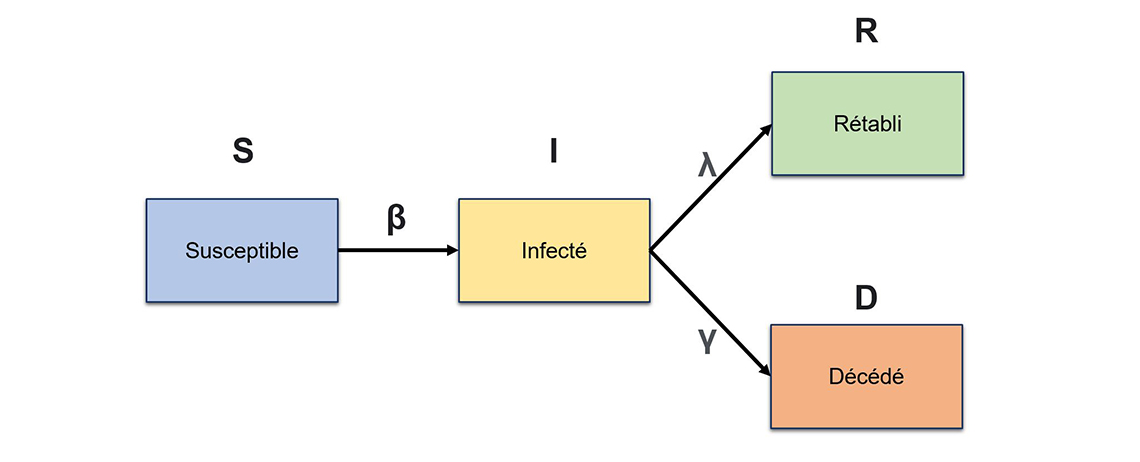


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from itertools import product
from scipy.optimize import minimize


In [2]:
#0 et 1
def sir(beta, gamma, mu, step, start, suscep, infect, retab, deces, duration):
    time = np.arange(start, duration, step)

    for i, _ in enumerate(time[:-1]):
        suscep.append(suscep[i] + step * (-beta * suscep[i] * infect[i]))
        infect.append(infect[i] + step * (beta * suscep[i] * infect[i] - gamma * infect[i]))
        retab.append(retab[i] + step * gamma * infect[i])
        deces.append(deces[i] + step * mu * infect[i])

    return time, suscep, infect, retab, deces

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [3]:
#1
beta = 0.5
gamma = 0.15
mu = 0.015
S0 = 0.99
I0 = 0.01
R0 = 0 
D0 = 0 
step = 0.01
duration = 90

# Simulation
suscep = [S0]
infect = [I0]
retab = [R0]
deces = [D0]

time, suscep, infect, retab, deces = sir(beta, gamma, mu, step, 0, suscep, infect, retab, deces, duration)

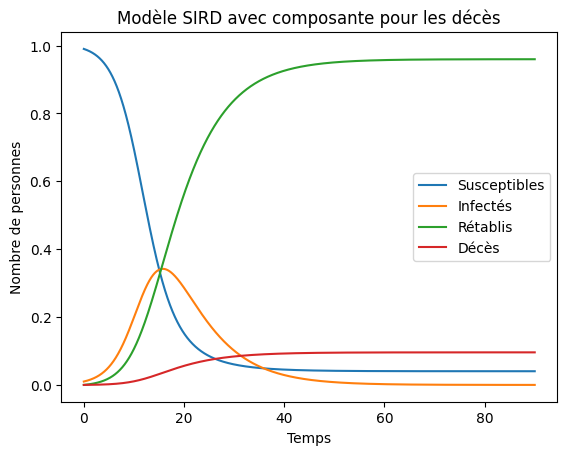

In [4]:
#2
def plot_sird_results(time, suscep, infect, retab, deces):
    plt.plot(time, suscep, label='Susceptibles')
    plt.plot(time, infect, label='Infectés')
    plt.plot(time, retab, label='Rétablis')
    plt.plot(time, deces, label='Décès')
    plt.xlabel('Temps')
    plt.ylabel('Nombre de personnes')
    plt.title('Modèle SIRD avec composante pour les décès')
    plt.legend()
    plt.show()
    
plot_sird_results(time, suscep, infect, retab, deces)

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [5]:
#1
df_sird = pd.read_csv('sird_dataset.csv')
df_sird.head()

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894


In [27]:
def cost_function(params, initial_conditions, step, duration, data):
    beta, gamma, mu = params
    suscep, infect, retab, deces = [initial_conditions[0]], [initial_conditions[1]], [initial_conditions[2]], [initial_conditions[3]]
    time, suscep, infect, retab, deces = sir(beta, gamma, mu, step, 0, suscep, infect, retab, deces, duration)
    # Sous-échantillonnage des données simulées pour correspondre à la longueur des données observées
    suscep_sampled = suscep[::int(1/step)]
    infect_sampled = infect[::int(1/step)]
    retab_sampled = retab[::int(1/step)]
    deces_sampled = deces[::int(1/step)]
    mse = mean_squared_error(data, np.array([suscep_sampled[:len(data)], infect_sampled[:len(data)], retab_sampled[:len(data)], deces_sampled[:len(data)]]).T)
    return mse

In [28]:
initial_conditions = [df_sird['Susceptibles'][0], df_sird['Infectés'][0], df_sird['Rétablis'][0], df_sird['Décès'][0]]
step = 0.01
duration = len(df_sird)
data = df_sird[['Susceptibles', 'Infectés', 'Rétablis', 'Décès']].values

Dans notre cas, la Mean Squared Error (MSE) est plus pertinente que la Cross-Entropy Error (CCE) car nous modélisons des variables continues représentant le nombre de personnes dans différents compartiments (susceptibles, infectés, rétablis, décès) au fil du temps. La MSE est particulièrement adaptée pour évaluer la performance des modèles de régression en mesurant directement l'écart quadratique moyen entre les valeurs observées et les valeurs prédites. En revanche, la CCE est principalement utilisée pour les problèmes de classification, où les valeurs à prédire sont des probabilités de classes. Étant donné que notre objectif est de minimiser l'erreur de prédiction sur des variables continues, la MSE fournit une mesure intuitive et directe de la précision de notre modèle.

In [31]:
initial_guess = [0.3, 0.1, 0.01]
bounds = [(0.25, 0.5), (0.08, 0.15), (0.005, 0.015)]

result = minimize(cost_function, initial_guess, args=(initial_conditions, step, duration, data), method='L-BFGS-B', bounds=bounds)

best_params = result.x
print(f'Best parameters: beta={best_params[0]}, gamma={best_params[1]}, mu={best_params[2]}')
print(f'Best cost (MSE): {result.fun}')


Best parameters: beta=0.3447395155441059, gamma=0.12974094227044822, mu=0.012698647004929042
Best cost (MSE): 0.0012012410988295097


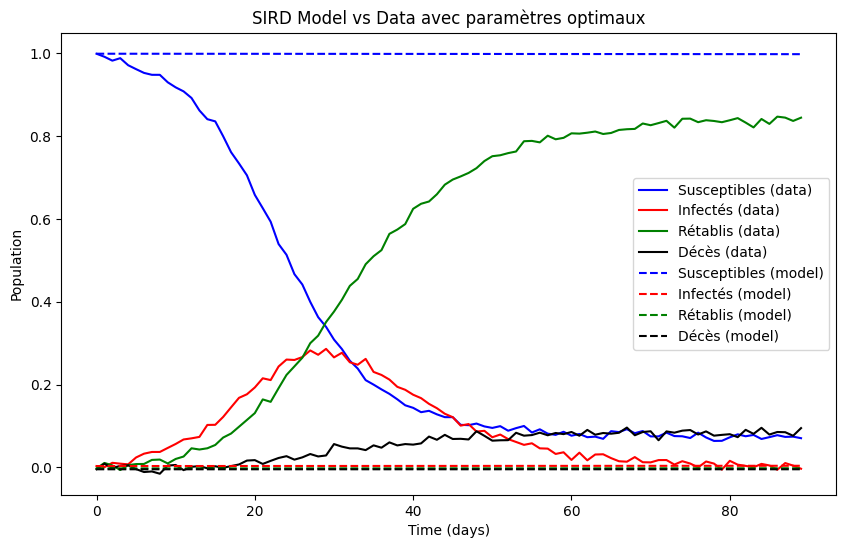

In [32]:
optimal_suscep, optimal_infect, optimal_retab, optimal_deces = [initial_conditions[0]], [initial_conditions[1]], [initial_conditions[2]], [initial_conditions[3]]
time, optimal_suscep, optimal_infect, optimal_retab, optimal_deces = sir(best_params[0], best_params[1], best_params[2], step, 0, optimal_suscep, optimal_infect, optimal_retab, optimal_deces, duration)

plt.figure(figsize=(10, 6))
plt.plot(df_sird['Jour'], df_sird['Susceptibles'], 'b-', label='Susceptibles (data)')
plt.plot(df_sird['Jour'], df_sird['Infectés'], 'r-', label='Infectés (data)')
plt.plot(df_sird['Jour'], df_sird['Rétablis'], 'g-', label='Rétablis (data)')
plt.plot(df_sird['Jour'], df_sird['Décès'], 'k-', label='Décès (data)')
plt.plot(time[::int(1/step)], optimal_suscep[:len(df_sird)], 'b--', label='Susceptibles (model)')
plt.plot(time[::int(1/step)], optimal_infect[:len(df_sird)], 'r--', label='Infectés (model)')
plt.plot(time[::int(1/step)], optimal_retab[:len(df_sird)], 'g--', label='Rétablis (model)')
plt.plot(time[::int(1/step)], optimal_deces[:len(df_sird)], 'k--', label='Décès (model)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SIRD Model vs Data avec paramètres optimaux')
plt.show()

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.

R0 initial: 2.42
R0 après intervention: 1.21


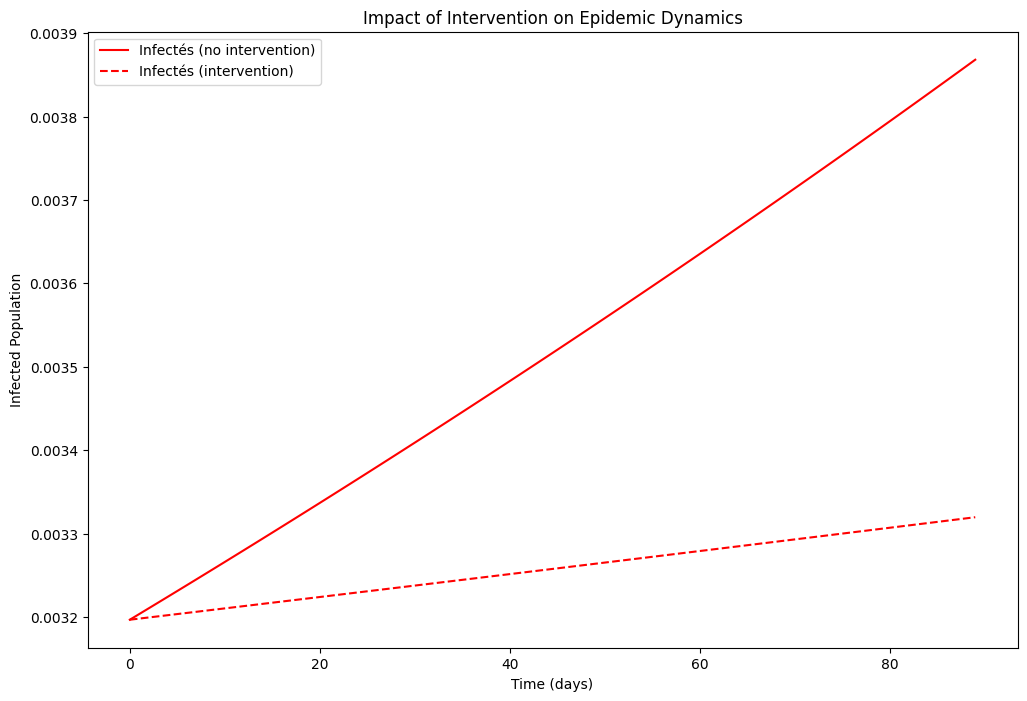

In [34]:
R0_initial = best_params[0] / (best_params[1] + best_params[2])
print(f'R0 initial: {R0_initial:.2f}')

beta_reduced = best_params[0] * 0.5

R0_reduced = beta_reduced / (best_params[1] + best_params[2])
print(f'R0 après intervention: {R0_reduced:.2f}')

suscep_intervention, infect_intervention, retab_intervention, deces_intervention = [initial_conditions[0]], [initial_conditions[1]], [initial_conditions[2]], [initial_conditions[3]]
time_intervention, suscep_intervention, infect_intervention, retab_intervention, deces_intervention = sir(beta_reduced, best_params[1], best_params[2], step, 0, suscep_intervention, infect_intervention, retab_intervention, deces_intervention, duration)

plt.figure(figsize=(12, 8))
plt.plot(time[::int(1/step)], optimal_infect[:len(df_sird)], 'r-', label='Infectés (no intervention)')
plt.plot(time_intervention[::int(1/step)], infect_intervention[:len(df_sird)], 'r--', label='Infectés (intervention)')
plt.xlabel('Time (days)')
plt.ylabel('Infected Population')
plt.legend()
plt.title('Impact of Intervention on Epidemic Dynamics')
plt.show()

3.